In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
sns.set_style('darkgrid')

In [2]:
sys.path.append('./data_science_procs/')

In [3]:
from dataset import cramerv

In [129]:
data = pd.read_csv('./results2.csv').replace('madrid', "Madrid")

In [130]:
data['In che citta\' vivi?'] = data['In che citta\' vivi?'].str.strip().str.capitalize()

In [77]:
age_col = "In che fascia di eta' sei?"

In [131]:
data

Informazioni cronologiche In che fascia di eta' sei? In che citta' vivi?  \
0   2019/05/13 11:59:08 AM EET                        65+              Madrid   
1   2019/05/20 11:32:11 PM EET                      25-34          Copenhagen   
2    2019/05/21 9:18:23 AM EET                      25-34          Copenhagen   
3    2019/05/21 5:55:51 PM EET                      25-34          Copenhagen   
4    2019/05/25 1:07:58 AM EET                      25-34              Madrid   
5    2019/05/27 2:54:08 PM EET                      45-54           Bruxelles   
6    2019/05/27 3:31:53 PM EET                      35-44              Madrid   
7    2019/05/27 3:36:39 PM EET                      25-34              Madrid   
8   2019/05/27 10:00:51 PM EET                      35-44              Madrid   
9   2019/05/27 10:01:15 PM EET                      35-44              Madrid   
10   2019/05/30 1:13:02 PM EET                      25-34              Madrid   

   Qual e' il piu' alto titolo di studio che hai?  \
0                               Laurea Magistrale   
1                               Laurea Magistrale   
2                                Laurea Triennale   
3                                Laurea Triennale   
4                               Laurea Magistrale   
5                               Laurea Magistrale   
6                               Laurea Magistrale   
7                     Diploma di scuola Superiore   
8                               Laurea Magistrale   
9                               Laurea Magistrale   
10                                     Dottorando   

   Che tipo di laurea hai conseguito?  \
0                Accademia Belle Arti   
1               Ingegneria gestionale   
2               Ingegneria gestionale   
3                   Ingegneria civile   
4                   Filologia moderna   
5                      Giurisprudenza   
6                         Informatica   
7                                 NaN   
8                Ingegneria biomedica   
9              Ingegneria informatica   
10                        Informatica   

    Nutri curiosità verso le nuove tecnologie e le applicheresti nel tuo ambito lavorativo o nella tua vita quotidiana?  \
0                                                   3                                                                     
1                                                   5                                                                     
2                                                   5                                                                     
3                                                   4                                                                     
4                                                   3                                                                     
5                                                   5                                                                     
6                                                   4                                                                     
7                                                   5                                                                     
8                                                   5                                                                     
9                                                   5                                                                     
10                                                  5                                                                     

   Quali attività esegui di solito con uno smartphone?  \
0                 Navigazione web;Mail;Social network    
1    Divertimento;Navigazione web;Mail;Social network    
2    Divertimento;Navigazione web;Mail;Social network    
3                 Navigazione web;Mail;Social network    
4   Divertimento;Navigazione web;Mail;Scrittura do...    
5                    Divertimento;Mail;Social network    
6                  

In [117]:
plt.pie()

<function pandas.plotting._core.FramePlotMethods.pie(self, y=None, **kwds)>

In [123]:
data[data['In che citta\' vivi?'] == 'Copenhagen ']

Informazioni cronologiche In che fascia di eta' sei? In che citta' vivi?  \
1  2019/05/20 11:32:11 PM EET                      25-34         Copenhagen    

  Qual e' il piu' alto titolo di studio che hai?  \
1                              Laurea Magistrale   

  Che tipo di laurea hai conseguito?  \
1              Ingegneria gestionale   

   Nutri curiosità verso le nuove tecnologie e le applicheresti nel tuo ambito lavorativo o nella tua vita quotidiana?  \
1                                                  5                                                                     

  Quali attività esegui di solito con uno smartphone?  \
1   Divertimento;Navigazione web;Mail;Social network    

    Quali attività esegui di solito con un computer?  \
1  Divertimento;Navigazione web;Mail;Social netwo...   

   Complessivamente ti ritieni soddisfatto/a dell’attuale sistema di voto?  \
1                                                  3                         

   Quanto sei informato sull'attuale sistema di voto?  \
1                                                  3    

   Prima di andare a votare, quanto ti informi sul contentuto della proposta?  \
1                                                  5                            

  Hai votato con il sistema postale?  \
1                                 No   

   Trovi facile votare con il sistema postale?  \
1                                          NaN   

  Quali sono le possibili cause che ti hanno portato a non votare?  \
1                                   È poco intuitivo                 

  Descrivi sinteticamente pregi e difetti dell’attuale sistema di voto non evidenziati dalla domanda precedente  \
1                                                NaN                                                              

   Useresti un'applicazione per votare?  \
1                                     5   

   Gradiresti delle notifiche come promemoria per il voto?  \
1                                                  5         

   Che pensi di un sistema di autenticazione al voto basato su impronte digitali?  \
1                                                  4                                

   Che ne pensi di un'anteprima od un link al contenuto della proposta prima che l'utente effettivamente voti?  \
1                                                  5                                                             

  Per quale tipo di votazione useresti l’applicazione?  
1  Elezioni comunali;Elezioni nazionali;Elezioni ...

In [164]:
from random import randint
def save_freq_responses():
    for i, col in enumerate(data.columns.drop('Informazioni cronologiche').tolist()):
        counts = (data[col].value_counts() / len(data))
        if counts.index.dtype == np.float:
            counts.index = counts.index.astype('int')
        if counts.index.dtype == np.int and max(counts.index) <= 5 and min(counts.index) >= 0:
            for r_type in range(1, 6):
                if r_type not in counts.index:
                    counts[r_type] = 0
            counts = counts.sort_index()
        is_numeric = np.int == counts.index.dtype
        if is_numeric:
            counts.plot.bar(figsize=(9, 7))
            plt.ylim((0,1))
            plt.title(col, fontsize=11)
            plt.tight_layout()
        else:
            a = 289 if i == 2 else randint(0,360)
            counts.plot.pie(figsize=(10,10), startangle=a, textprops={'fontsize': 13}, rotatelabels=False)
            plt.ylabel('')
            plt.title(col)
        plt.savefig('../img/response_freq_' + str(i+1))
        plt.close()

In [165]:
save_freq_responses()

In [43]:
def extract_choise_values(colname):
    sm_activities = data[colname].str.split(';')
    all_activities = set(sm_activities.aggregate(np.sum))
    for act in all_activities:
        data[colname + '_' + act] = sm_activities.apply(lambda row: act in row)

In [44]:
sm_col = 'Quali attività esegui di solito con uno smartphone?'
extract_choise_values(sm_col)
del data[sm_col]

In [45]:
pc_col = 'Quali attività esegui di solito con un computer?'
extract_choise_values(pc_col)
del data[pc_col]

In [46]:
data_fix = data.drop(columns='Informazioni cronologiche').loc[:, ~data.isna().any()].replace('madrid', "Madrid")

In [47]:
data_fix

In che fascia di eta' sei? In che citta' vivi?  \
0                         65+              Madrid   
1                       25-34         Copenhagen    
2                       25-34          Copenhagen   
3                       25-34          Copenhagen   
4                       25-34              Madrid   
5                       45-54           bruxelles   
6                       35-44              Madrid   
7                       25-34              Madrid   
8                       35-44              Madrid   
9                       35-44              Madrid   
10                      25-34              Madrid   

   Qual e' il piu' alto titolo di studio che hai?  \
0                               Laurea Magistrale   
1                               Laurea Magistrale   
2                                Laurea Triennale   
3                                Laurea Triennale   
4                               Laurea Magistrale   
5                               Laurea Magistrale   
6                               Laurea Magistrale   
7                     Diploma di scuola Superiore   
8                               Laurea Magistrale   
9                               Laurea Magistrale   
10                                     Dottorando   

    Nutri curiosità verso le nuove tecnologie e le applicheresti nel tuo ambito lavorativo o nella tua vita quotidiana?  \
0                                                   3                                                                     
1                                                   5                                                                     
2                                                   5                                                                     
3                                                   4                                                                     
4                                                   3                                                                     
5                                                   5                                                                     
6                                                   4                                                                     
7                                                   5                                                                     
8                                                   5                                                                     
9                                                   5                                                                     
10                                                  5                                                                     

    Complessivamente ti ritieni soddisfatto/a dell’attuale sistema di voto?  \
0                                                   3                         
1                                                   3                         
2                                                   3                         
3                                                   3                         
4                                                   5                         
5                                                   4                         
6                                                   4                         
7                                                   3                         
8                                                   4                         
9                                                   4                         
10                                                  4                         

    Quanto sei informato sull'attuale sistema di voto?  \
0                                                   4    
1                                                   3    
2                                                   1    
3                                                   1    
4            

In [ ]:
import googletrans
translator = googletrans.Translator()

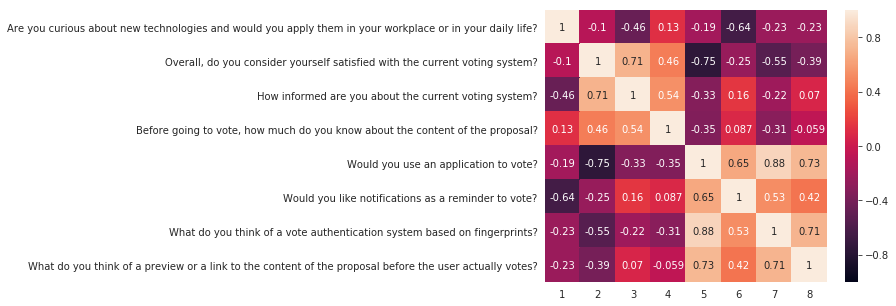

In [83]:
ordinal_cat = data_fix.select_dtypes('int')
fig, ax = plt.subplots(figsize=(14, 5))
eng_cols = [translator.translate(txt).text for txt in ordinal_cat.columns]
sns.heatmap(ordinal_cat.corr('spearman'), annot=True, yticklabels=eng_cols, xticklabels=np.arange(len(eng_cols))+1, ax=ax, vmin=-1, vmax=1)
fig.subplots_adjust(left = 0.55)
plt.savefig('../img/corr_answer_1_to_5.png', pad_inches=1)
plt.show()
del ordinal_cat, eng_cols, ax, fig

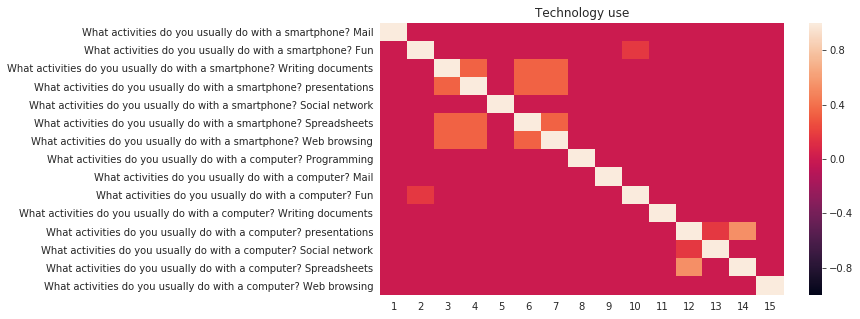

In [82]:
other_cat = []
labels = list(map(lambda txt: translator.translate(txt).text, data_fix.select_dtypes('bool').columns.str.replace('_', ' ').tolist() + other_cat)) 
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(cramerv(data_fix, cols=data_fix.select_dtypes('bool').columns.tolist() + other_cat),
                 yticklabels=labels, xticklabels=np.arange(len(labels))+1, ax=ax, vmin=-1, vmax=1)
fig.subplots_adjust(left = 0.4)
ax.set_title("Technology use")
plt.savefig('../img/corr_technology.png')